In [1]:
import os
import yaml
import pandas as pd
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

In [2]:
test_data_fn = "../../../data/webcorp_morphemes/most_frequent/80_20/test"

test_data = pd.read_table(test_data_fn, names=["input", "tagging"])
test_data["input"] = test_data["input"].str.replace(" ", "")
test_data["tagging"] = test_data["tagging"].str.replace(" ", "")

def tagging2segmentation(row):
    word = row.loc["input"]
    tagging = row.loc["tagging"]
    out = []
    for i, c in enumerate(word):
        if tagging[i] == 'B' and i > 0:
            out.append(" ")
        out.append(c)
    return "".join(out)

test_data["gold"] = test_data.apply(tagging2segmentation, axis=1)
test_data = test_data.set_index("input")
test_data = test_data.drop("tagging", axis=1)
test_data.head()

,gold
input,
alázzák,aláz zák
versenypályák,verseny pályá k
durvábbá,durvá bb á
jogvédelemre,jog védelem re
keresztszülők,kereszt szülő k


In [3]:
EXP_DIR = "../exps/tagging/most_frequent/"

results = []

for dirname in os.listdir(EXP_DIR):
    print(dirname)
    res_file = os.path.join(EXP_DIR, dirname, "result.yaml")
    if not os.path.exists(res_file):
        continue
        
    cfg_file = os.path.join(EXP_DIR, dirname, "config.yaml")
        
    with open(cfg_file) as f:
        config = yaml.load(f)
    d = {"cfg.{}".format(key): value for key, value in config.items()}
    
    with open(res_file) as f:
        result = yaml.load(f)
    d.update({"res.{}".format(key): value for key, value in result.items()})
    
    test_sum = os.path.join(EXP_DIR, dirname, "results.stat")
    with open(test_sum) as f:
        for line in f:
            k, v = line.strip().split("\t")
            try:
                d["test.{}".format(k)] = int(v)
            except ValueError:
                d["test.{}".format(k)] = float(v)
    
    d["exp_dir"] = dirname
    results.append(d)
    
    test_fn = os.path.join(EXP_DIR, dirname, "test.out")
    test_out = pd.read_table(test_fn, names=["input", "tagging"])
    test_out[dirname] = test_out.apply(tagging2segmentation, axis=1)
    test_out = test_out.drop("tagging", axis=1).set_index("input")
    
    test_data[dirname] = test_out
    
results = pd.DataFrame(results).set_index("exp_dir")

0000
0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
0047
0048
0049
0050
0051
0052
0053
0054
0055
0056
0057
0058
0059
0060
0061
0062
0063
0064
0065
0066
0067
0068
0069
0070
0071
0072
0073
0074
0075
0076
0077
0078
0079
0080
0081
0082
0083
0084
0085
0086
0087
0088
0089
0090
0091
0092
0093
0094
0095
0096
0097
0098
0099


In [4]:
test_data.head()

,gold,0000,0001,0002,0003,0004,0005,0006,0007,0008,...,0090,0091,0092,0093,0094,0095,0096,0097,0098,0099
input,,,,,,,,,,,,,,,,,,,,,
alázzák,aláz zák,alázzák,alá z zák,aláz zák,aláz zák,aláz zák,aláz zák,alá z zák,aláz zák,aláz zák,...,alá z zák,aláz zák,aláz zák,aláz zák,aláz zák,aláz zák,aláz zák,aláz zák,aláz zák,aláz zák
versenypályák,verseny pályá k,verseny pál y ák,verseny pályá k,verseny pályá k,verseny pályá k,verseny pályá k,verseny pályá k,verseny pályá k,verseny pályá k,verseny pályá k,...,verseny pályá k,verseny pályá k,verseny pályá k,verseny pályá k,verseny pályá k,verseny pályá k,verseny pályá k,verseny pályá k,verseny pályá k,verseny pályá k
durvábbá,durvá bb á,durvá bbá,durvább á,durvá bb á,durvá bb á,durvá bb á,durvá bb á,durvá bb á,durvá bb á,durvá bb á,...,durvá bb á,durvá bb á,durvá bb á,durvá bb á,durvá bb á,durvá bb á,durvá bb á,durvá bb á,durvá bb á,durvá bb á
jogvédelemre,jog védelem re,jog védelem re,jog védelem re,jog védelem re,jog védelem re,jog védelem re,jog védelem re,jog védelem re,jog védelem re,jog védelem re,...,jog védelem re,jog védelem re,jog védelem re,jog védelem re,jog védelem re,jog védelem re,jog védelem re,jog védelem re,jog védelem re,jog védelem re
keresztszülők,kereszt szülő k,kereszt szül ők,kereszt szülő k,kereszt szülő k,kereszt szülő k,kereszt szülő k,kereszt szülő k,kereszt szülő k,kereszt szülő k,kereszt szülő k,...,kereszt szülő k,kereszt szülő k,kereszt szülő k,kereszt szülő k,kereszt szülő k,kereszt szülő k,kereszt szülő k,kereszt szülő k,kereszt szülő k,kereszt szülő k


In [5]:
test_stat = pd.DataFrame(columns=["word_accuracy"])

for col in test_data.columns:
    if col == "gold":
        continue
    test_stat.loc[col] = (test_data[col] == test_data["gold"]).mean()

In [6]:
test_stat.sort_values("word_accuracy", ascending=False).head()

,word_accuracy
0065,0.951606
0016,0.949341
0053,0.948620
0064,0.948208
0084,0.946767


In [7]:
results.sort_values("test.word_accuracy", ascending=False).head()

,cfg.batch_size,cfg.dataset_class,cfg.dev_file,cfg.dropout,cfg.early_stopping_ratio,cfg.embedding_size_src,cfg.embedding_size_tgt,cfg.epochs,cfg.experiment_dir,cfg.generate_empty_subdir,...,test.neg,test.pos,test.precision,test.recall,test.sum,test.sum_with_lendiff,test.tn,test.tp,test.word_accuracy,test.words
exp_dir,,,,,,,,,,,,,,,,,,,,,
0065,128,TaggingDataset,../../data/webcorp_morphemes/most_frequent/80_...,0.5,1.5,20,None,50,exps/tagging/most_frequent/0065,True,...,82984,18262,0.979931,0.986639,101246,101246,82615,18018,0.951606,9712
0016,128,TaggingDataset,../../data/webcorp_morphemes/most_frequent/80_...,0.2,1.5,30,None,50,exps/tagging/most_frequent/0016,True,...,82984,18262,0.979284,0.986256,101246,101246,82603,18011,0.949341,9712
0053,64,TaggingDataset,../../data/webcorp_morphemes/most_frequent/80_...,0.2,1.5,10,None,50,exps/tagging/most_frequent/0053,True,...,82984,18262,0.978498,0.986803,101246,101246,82588,18021,0.948620,9712
0064,64,TaggingDataset,../../data/webcorp_morphemes/most_frequent/80_...,0.5,1.5,30,None,50,exps/tagging/most_frequent/0064,True,...,82984,18262,0.977986,0.987679,101246,101246,82578,18037,0.948208,9712
0084,128,TaggingDataset,../../data/webcorp_morphemes/most_frequent/80_...,0.2,1.2,30,None,50,exps/tagging/most_frequent/0084,True,...,82984,18262,0.980361,0.984065,101246,101246,82624,17971,0.946767,9712


In [8]:
result_cols = list(filter(lambda c: c.startswith("test"), results.columns))
result_cols = ["test.word_accuracy", "test.F-score", "test.precision", "test.recall", "test.accuracy"]
print(results.groupby("cfg.hidden_size_src")[result_cols].size())
results.groupby("cfg.hidden_size_src")[result_cols].max()

cfg.hidden_size_src
128     26
256     23
512     24
1024    27
dtype: int64


,test.word_accuracy,test.F-score,test.precision,test.recall,test.accuracy
cfg.hidden_size_src,,,,,
128,0.938221,0.979724,0.975820,0.984339,0.992652
256,0.948620,0.982633,0.978498,0.986803,0.993708
512,0.951606,0.983274,0.979931,0.987679,0.993945
1024,0.949341,0.982758,0.980361,0.986256,0.993758


## Aggressive dropout is not good

In [9]:
param = "cfg.dropout"
print(results.groupby("cfg.dropout")[result_cols].size())
results.groupby("cfg.dropout")[result_cols].describe()

cfg.dropout
0.0    23
0.2    26
0.5    36
0.8    15
dtype: int64


test.word_accuracy                                          \
                         count      mean       std       min       25%   
cfg.dropout                                                              
0.0                       23.0  0.917346  0.016240  0.884473  0.910626   
0.2                       26.0  0.930467  0.017674  0.889209  0.912016   
0.5                       36.0  0.913006  0.028782  0.842257  0.901436   
0.8                       15.0  0.654379  0.228190  0.308072  0.413921   

                                          test.F-score              ...     \
                  50%       75%       max        count      mean    ...      
cfg.dropout                                                         ...      
0.0          0.919996  0.930344  0.935441         23.0  0.973253    ...      
0.2          0.940743  0.943858  0.949341         26.0  0.977300    ...      
0.5          0.915980  0.938015  0.951606         36.0  0.971880    ...      
0.8          0.748044  0.840610  0.924320         15.0  0.862558    ...      

            test.recall           test.accuracy                                \
                    75%       max         count      mean       std       min   
cfg.dropout                                                                     
0.0            0.978863  0.980999          23.0  0.990327  0.001810  0.986646   
0.2            0.984544  0.986803          26.0  0.991776  0.001943  0.987071   
0.5            0.985243  0.987679          36.0  0.989802  0.003234  0.981659   
0.8            0.958876  0.982368          15.0  0.952104  0.035669  0.893467   

                                                     
                  25%       50%       75%       max  
cfg.dropout                                          
0.0          0.989456  0.990627  0.991792  0.992454  
0.2          0.989847  0.992898  0.993254  0.993758  
0.5          0.988538  0.990340  0.992402  0.993945  
0.8          0.914535  0.968977  0.981194  0.990805  

[4 rows x 40 columns]

## Slowest experiments

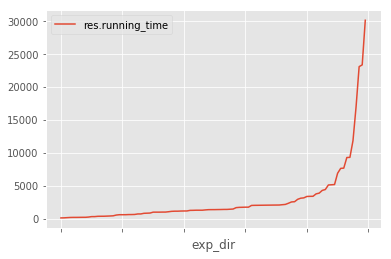

In [10]:
results.sort_values("res.running_time").plot(y="res.running_time")

A few experiments ran for a very long time:

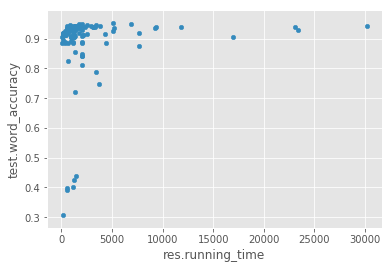

In [11]:
results.plot(x="res.running_time", y="test.word_accuracy", kind="scatter")  # .sort_values("res.running_time", ascending=False)

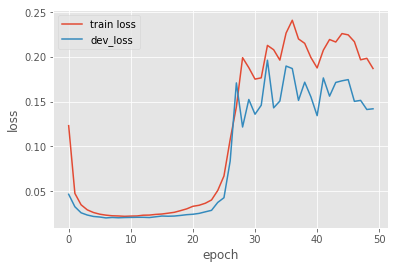

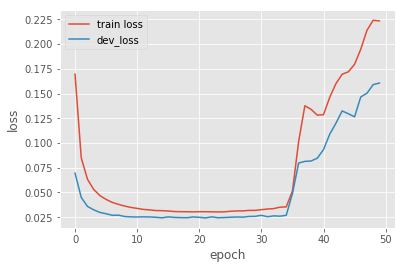

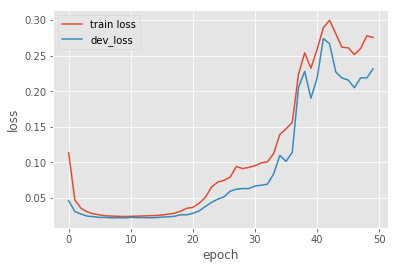

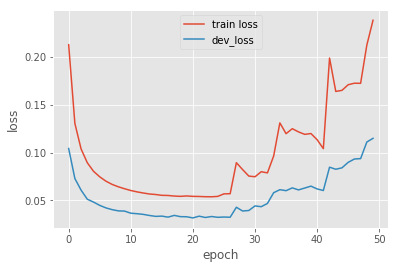

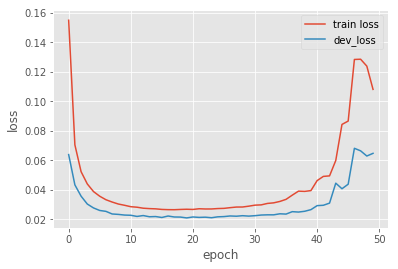

In [13]:
def plot_losses(exp):
    train_loss = exp.loc["res.train_loss"]
    dev_loss = exp.loc["res.dev_loss"]
    fig, ax = plt.subplots()
    ax.plot(train_loss)
    ax.plot(dev_loss)
    ax.legend(["train loss", "dev_loss"])
    ax.set_xlabel("epoch")
    ax.set_ylabel("loss")
    pass

for row in results.sort_values("res.running_time", ascending=False).iloc[:5].iterrows():
    plot_losses(row[1])

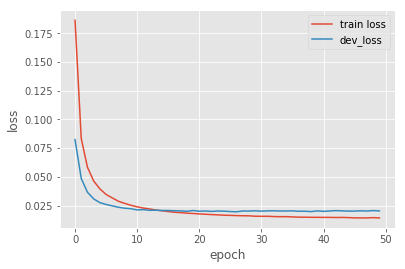

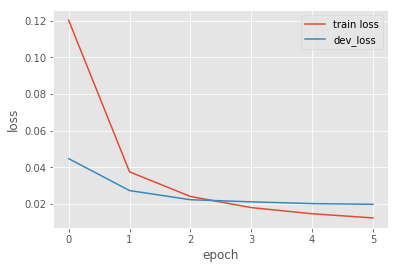

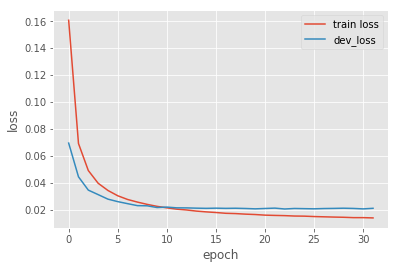

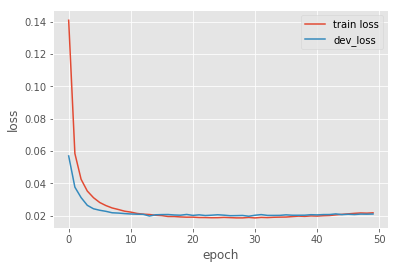

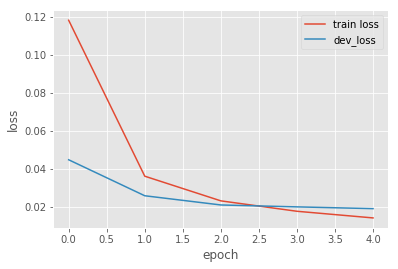

In [14]:
def plot_losses(exp):
    train_loss = exp.loc["res.train_loss"]
    dev_loss = exp.loc["res.dev_loss"]
    fig, ax = plt.subplots()
    ax.plot(train_loss)
    ax.plot(dev_loss)
    ax.legend(["train loss", "dev_loss"])
    ax.set_xlabel("epoch")
    ax.set_ylabel("loss")
    pass

for row in results.sort_values("test.word_accuracy", ascending=False).iloc[:5].iterrows():
    plot_losses(row[1])

In [15]:
param = "cfg.hidden_size_src"
print(results.groupby(param)[result_cols].size())
results.groupby(param)[result_cols].describe()

cfg.hidden_size_src
128     26
256     23
512     24
1024    27
dtype: int64


test.word_accuracy                                \
                                 count      mean       std       min   
cfg.hidden_size_src                                                    
128                               26.0  0.812342  0.186933  0.308072   
256                               23.0  0.918196  0.017629  0.884782   
512                               24.0  0.892959  0.119075  0.391269   
1024                              27.0  0.900169  0.107156  0.401462   

                                                            test.F-score  \
                          25%       50%       75%       max        count   
cfg.hidden_size_src                                                        
128                  0.842514  0.885554  0.912943  0.938221         26.0   
256                  0.906456  0.912788  0.936831  0.948620         23.0   
512                  0.913277  0.931631  0.940409  0.951606         24.0   
1024                 0.913200  0.929263  0.942391  0.949341         27.0   

                                 ...    test.recall           test.accuracy  \
                         mean    ...            75%       max         count   
cfg.hidden_size_src              ...                                          
128                  0.929667    ...       0.978069  0.984339          26.0   
256                  0.973564    ...       0.984941  0.986803          23.0   
512                  0.962322    ...       0.984791  0.987679          24.0   
1024                 0.965245    ...       0.984093  0.986256          27.0   

                                                                       \
                         mean       std       min       25%       50%   
cfg.hidden_size_src                                                     
128                  0.975027  0.029020  0.893467  0.981715  0.986720   
256                  0.990422  0.001911  0.986824  0.989195  0.989837   
512                  0.986703  0.016814  0.913389  0.990007  0.991886   
1024                 0.987660  0.015308  0.914930  0.989945  0.991713   

                                         
                          75%       max  
cfg.hidden_size_src                      
128                  0.989775  0.992652  
256                  0.992335  0.993708  
512                  0.992854  0.993945  
1024                 0.993057  0.993758  

[4 rows x 40 columns]

In [16]:
param = "cfg.embedding_size_src"
print(results.groupby(param)[result_cols].size())
results.groupby(param)[result_cols].describe()

cfg.embedding_size_src
10    30
20    30
30    40
dtype: int64


test.word_accuracy                                \
                                    count      mean       std       min   
cfg.embedding_size_src                                                    
10                                   30.0  0.810389  0.214807  0.308072   
20                                   30.0  0.899375  0.057114  0.720861   
30                                   40.0  0.917051  0.026997  0.826194   

                                                               test.F-score  \
                             25%       50%       75%       max        count   
cfg.embedding_size_src                                                        
10                      0.844419  0.911553  0.937938  0.948620         30.0   
20                      0.905169  0.913406  0.934617  0.951606         30.0   
30                      0.907537  0.919790  0.938118  0.949341         40.0   

                                    ...    test.recall            \
                            mean    ...            75%       max   
cfg.embedding_size_src              ...                            
10                      0.926063    ...       0.983531  0.986803   
20                      0.967177    ...       0.983107  0.986639   
30                      0.973086    ...       0.984380  0.987679   

                       test.accuracy                                          \
                               count      mean       std       min       25%   
cfg.embedding_size_src                                                         
10                              30.0  0.974180  0.032481  0.893467  0.981975   
20                              30.0  0.988098  0.006912  0.966547  0.988980   
30                              40.0  0.990244  0.003084  0.979812  0.989224   

                                                      
                             50%       75%       max  
cfg.embedding_size_src                                
10                      0.989718  0.992595  0.993708  
20                      0.990064  0.992089  0.993945  
30                      0.990676  0.992429  0.993768  

[3 rows x 40 columns]

In [17]:
param = "cfg.num_layers_src"
print(results.groupby(param)[result_cols].size())
results.groupby(param)[result_cols].describe()

cfg.num_layers_src
1    40
2    48
3    12
dtype: int64


test.word_accuracy                                          \
                                count      mean       std       min       25%   
cfg.num_layers_src                                                              
1                                40.0  0.873952  0.099814  0.308072  0.884704   
2                                48.0  0.871096  0.162606  0.391269  0.917859   
3                                12.0  0.933690  0.011904  0.909390  0.931811   

                                                 test.F-score            \
                         50%       75%       max        count      mean   
cfg.num_layers_src                                                        
1                   0.905169  0.911450  0.920408         40.0  0.957047   
2                   0.933072  0.941567  0.951606         48.0  0.952123   
3                   0.935544  0.942262  0.946767         12.0  0.978073   

                      ...    test.recall           test.accuracy            \
                      ...            75%       max         count      mean   
cfg.num_layers_src    ...                                                    
1                     ...       0.976796  0.978699          40.0  0.984698   
2                     ...       0.984832  0.987679          48.0  0.983031   
3                     ...       0.985503  0.986584          12.0  0.992059   

                                                                                
                         std       min       25%       50%       75%       max  
cfg.num_layers_src                                                              
1                   0.015527  0.893467  0.986629  0.988898  0.989735  0.990765  
2                   0.023987  0.912905  0.990382  0.992054  0.992992  0.993945  
3                   0.001334  0.989323  0.991906  0.992266  0.993042  0.993570  

[3 rows x 40 columns]

In [18]:
param = "cfg.batch_size"
print(results.groupby(param)[result_cols].size())
results.groupby(param)[result_cols].describe()

cfg.batch_size
32     23
64     38
128    39
dtype: int64


test.word_accuracy                                          \
                            count      mean       std       min       25%   
cfg.batch_size                                                              
32                           23.0  0.859170  0.140393  0.426380  0.861923   
64                           38.0  0.887779  0.124786  0.391269  0.906919   
128                          39.0  0.884064  0.130786  0.308072  0.897241   

                                             test.F-score              ...     \
                     50%       75%       max        count      mean    ...      
cfg.batch_size                                                         ...      
32              0.913303  0.929984  0.938427         23.0  0.949900    ...      
64              0.918194  0.939250  0.948620         38.0  0.960566    ...      
128             0.917731  0.939920  0.951606         39.0  0.958243    ...      

               test.recall           test.accuracy                      \
                       75%       max         count      mean       std   
cfg.batch_size                                                           
32                0.978863  0.985599          23.0  0.981926  0.021556   
64                0.984161  0.987679          38.0  0.985980  0.017924   
128               0.984284  0.986639          39.0  0.985297  0.019792   

                                                                  
                     min       25%       50%       75%       max  
cfg.batch_size                                                    
32              0.912905  0.983930  0.989837  0.991689  0.992652  
64              0.913389  0.989266  0.990459  0.992671  0.993768  
128             0.893467  0.988079  0.990528  0.992800  0.993945  

[3 rows x 40 columns]

In [19]:
results.columns

Index(['cfg.batch_size', 'cfg.dataset_class', 'cfg.dev_file', 'cfg.dropout',
       'cfg.early_stopping_ratio', 'cfg.embedding_size_src',
       'cfg.embedding_size_tgt', 'cfg.epochs', 'cfg.experiment_dir',
       'cfg.generate_empty_subdir', 'cfg.hidden_size_src',
       'cfg.hidden_size_tgt', 'cfg.model', 'cfg.num_layers_src',
       'cfg.num_layers_tgt', 'cfg.optimizer', 'cfg.optimizer_kwargs',
       'cfg.save_min_epoch', 'cfg.share_vocab', 'cfg.toy_eval',
       'cfg.train_file', 'cfg.train_schedule', 'cfg.use_eos',
       'cfg.vocab_path_src', 'cfg.vocab_path_tgt', 'res.dev_loss',
       'res.running_time', 'res.start_time', 'res.train_loss', 'test.F-score',
       'test.accuracy', 'test.correct_word', 'test.fn', 'test.fp',
       'test.incorrect_word', 'test.neg', 'test.pos', 'test.precision',
       'test.recall', 'test.sum', 'test.sum_with_lendiff', 'test.tn',
       'test.tp', 'test.word_accuracy', 'test.words'],
      dtype='object')

# Majority voting

Choose N best models according to dev loss, use majority voting.

In [47]:
N = 5

def get_nbest_accuracy(N):
    Nbest = results['res.dev_loss'].apply(min).sort_values()[:N].index
    return (test_data[Nbest].mode(axis=1)[0] == test_data['gold']).mean()
    
for n in range(1, 21):
    print(n, get_nbest_accuracy(n))

1 0.9467668863261944
2 0.948826194398682
3 0.9547981878088962
4 0.9554159802306426
5 0.9572693574958814
6 0.9567545304777595
7 0.9578871499176277
8 0.9573723228995058
9 0.9579901153212521
10 0.9581960461285008
11 0.9590197693574959
12 0.9584019769357496
13 0.9594316309719935
14 0.9592257001647446
15 0.9591227347611203
16 0.9592257001647446
17 0.9589168039538715
18 0.9595345963756178
19 0.9587108731466227
20 0.9586079077429983


In [44]:
results['test.word_accuracy'].sort_values().tail()

exp_dir
0084    0.946767
0064    0.948208
0053    0.948620
0016    0.949341
0065    0.951606
Name: test.word_accuracy, dtype: float64